# Représenter l'évolution annuelle et les types de dépôts dans les collections de HAL

Import de bibliothèque

In [47]:
import pandas as pd, json, requests

Définition des fonctions

In [48]:
def req_hal(year, TAMPID, subtype) :
    """nombre de publication pour telle année pour tel type de dépôt"""
    req = requests.get(f"http://api.archives-ouvertes.fr/search/{TAMPID}/?q=submittedDateY_i:{year}&fq=NOT+status_i:111&fq=submitType_s:{subtype}&rows=0")
    req = req.json()
    num = req['response']['numFound']
    return num

In [49]:
def req_total(year, TAMPID, st) :
    """nombre de publication pour telle année"""
    req = requests.get(f"https://api.archives-ouvertes.fr/search/{TAMPID}/?q=submittedDateY_i:{year}&fq=NOT+status_i:111&rows=0")
    req = req.json()
    tot = req['response']['numFound']
    return tot

Détermination de la collection et de la période

In [50]:
TAMPID = input("Quel est le TAMPID de la collection ? (en majuscules) : ")
year1 = int (input("Année de départ : "))
year2 = int (input("Année de fin : "))

Quel est le TAMPID de la collection ? (en majuscules) : DEC
Année de départ : 2017
Année de fin : 2018


Calculs des statistiques

In [51]:
totaux = {}
subtypes = ["total"]
for year in range(year1, year2+1):
    totaux[year] = {}
    for st in subtypes :
        tot = req_total(year, TAMPID, st)
        totaux[year][st] = tot

In [52]:
data = {}
subtypes = ["file", "notice", "annex"]
for year in range(year1, year2+1):
    data[year] = {}
    for st in subtypes : 
        num = req_hal(year, TAMPID, st)
        data[year][st] = num

Transformation en tableau et graphes

In [53]:
dftot = pd.DataFrame.from_dict(totaux)
df = pd.DataFrame.from_dict(data)
dffin = [df, dftot]
dffin = pd.concat(dffin)
dffin

,2017,2018
file,32,33
notice,68,55
annex,0,1
total,100,89


<AxesSubplot:>

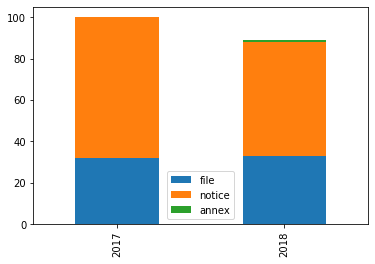

In [54]:
df = df.T # pour inverser colonnes et lignes
df.plot.bar(stacked = True)